<a href="https://colab.research.google.com/github/hasibzunair/neural-nets-for-babies/blob/main/intro_to_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Deep Learning (without PyTorch)

**Author:** [Hasib Zunair](https://hasibzunair.github.io/)<br>
**Date created:** 2022/02/12<br>
**Last modified:** 2022/02/12<br>

**Description:** This tutorial gives an intro to deep learning starting off from a single neuron and training a very simple net which identifies positive or negative pair of numbers.

**Learning Objectives:**
At the end of this tutorial, participants will be able to:

* understand the general workflow of training neural networks
* implement a small neural networks in pure NumPy

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(0)

### Define an artifical neuron (Neo)

In [2]:
def sigmoid(x):
    """
    Sigmoid activation function.
    f(x) = 1 / (1 + e^(-x))
    """
    return 1 / (1 + np.exp(-x))

class BabyNeuron:
    """
    Implementation of one neuron.
    """
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def forward(self, inputs):
        """
        Multiply inputs with "weights", then "activate".
        y = W * x + b
        """
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

### Initialize it with a weight and a bias

In [3]:
# Setup weights and bias (W and b)
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4

# Create our baby neuron
babynet = BabyNeuron(weights, bias)

### Pass inputs to make predictions

In [4]:
# Set inputs, x1 = 2 and x2 = 3
x = np.array([2, 3])

# Pass input x to babynet
print("Output: {:.5f}".format(babynet.forward(x)))
# Should get 0.99908

Output: 0.99909


## Define a bigger network (more than one Neo!)

In [5]:
class BigBaby:
    """
    A "network" with:
     - 2 inputs
     - a hidden layer with 2 neurons (h1, h2)
     - an output layer with 1 neuron (o1)
    
    Each neuron (i.e. BabyNeuron) has the same weight and bias:
     - w = [0, 1]
     - b = 0
    """
    def __init__(self):
        # We initialize using same weights and bias for each neuron
        weights = np.array([0, 1])
        bias = 0
        # BabyNeuron class from previous section
        self.h1 = BabyNeuron(weights, bias)
        self.h2 = BabyNeuron(weights, bias)
        self.o1 = BabyNeuron(weights, bias)

    def forward(self, x):
        out_h1 = self.h1.forward(x)
        out_h2 = self.h2.forward(x)
        # The inputs for o1 are the outputs from h1 and h2
        out_o1 = self.o1.forward(np.array([out_h1, out_h2]))
        return out_o1

In [6]:
# Create our BigBaby network
network = BigBaby()

# Set inputs, x1 = 2 and x2 = 3
x = np.array([2, 3])

# Pass input x to network and make predictions
print("Output: {:.5f}".format(network.forward(x)))
# Should get 0.72163

Output: 0.72163


## How to train/optimize?

It means to "update" parameters in such a way, that the "loss" is minimum. It means that the predictions made by the model
and the ground truths are very similar. Which is what we want!

A loss function (e.g. MSE) measures the guessed answers (i.e predictions) against the known correct answers (i.e ground truths) and measures how well or how badly it did.

In [7]:
def mse_loss(y_true, y_pred):
    """
    Compute mean squared error of predictions and ground truths.
    """
    return ((y_true - y_pred) ** 2).mean()

def deriv_mse_loss(y_true, y_pred):
    """
    Compute derivative of mean squared error of predictions and ground truths.
    """
    return -2 * (y_true - y_pred)

# define preds and ground truths (a.k.a labels, annotations, yada, yada, yada..)
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

# Compute MSE
print("MSE: {:.3f}".format(mse_loss(y_true, y_pred))) 
# Should get 0.5

MSE: 0.500


In [8]:
def deriv_sigmoid(x):
    """
    Derivative of sigmoid function.
    f'(x) = f(x) * (1 - f(x))
    """
    fx = sigmoid(x)
    return fx * (1 - fx)

In [9]:
# Just log the loss at each step, for visualization
losses = []

class BigBaby:
    """
    A "network" with:
     - 2 inputs
     - a hidden layer with 2 neurons (h1, h2)
     - an output layer with 1 neuron (o1)
    
    Each neuron (i.e. BabyNeuron) has the same weight and bias:
     - w = [0, 1]
     - b = 0
    """
    def __init__(self):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def forward(self, x):
        """
        Forward pass. x is a numpy array with 2 elements.
        """
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, xs, ys):
        """
        xs: is a (n x 2) numpy array, n = # of samples in the dataset.
        ys: is a numpy array with n elements.
        """
        learn_rate = 0.1
        epochs = 1000 # number of time to go over the data (x,y)
        
        # Iterate over the dataset
        for epoch in range(epochs):
            # Iterate over each data point in the dataset, we have 4.
            for x, y_true in zip(xs, ys):
                
                # STEP 1: FORWARD PASS
                # first hidden neuron h1
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                
                # second hidden neuron h2
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                
                # output neuron, o1, which takes h1 and h2 as inputs
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                
                # Final output from network
                y_pred = o1
                
                # NOTE: This is the famous backpropagation step. For now, just
                # know that it is an efficient way of computing the derivatives which
                # we need in order to update the weights and biases of our network.
                
                # Modern libraries do this step in the backend. We define only
                # the forward pass while coding up neural nets. Imagine doing 
                # this for 100 layers! 🤯
                ##############################################################
                
                # STEP 2: COMPUTE LOSS AND DERIVATIVES
                # Compute partial derivatives with respect to loss
                # NOTE: Since we are computing derivative wrt loss
                # it is implied that we also compute loss! 
                d_L_d_ypred = deriv_mse_loss(y_true, y_pred)
                
                # output neuron, o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # first hidden neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # second hidden neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)
                ##############################################################

                # STEP 3: UPDATE PARAMETERS BY USING DERIVATIVES OF LOSS WRT
                # WEIGHTS AND BIASES

                # Update rule for weights and biases
                # Formula: w_new = w_old - lr * d_L / d_w_old
                
                # first hidden neuron h1
                self.w1 = self.w1 - learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 = self.w2 - learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 = self.b1 - learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # second hidden neuron h2
                self.w3 = self.w3 - learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 = self.w4 - learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 = self.b2 - learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # output neuron, o1
                self.w5 = self.w5 - learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 = self.w6 - learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 = self.b3 - learn_rate * d_L_d_ypred * d_ypred_d_b3
            
            # STEP 4: DO IT AGAIN. ALSO, LOG SOME VALUES
            # Calculate loss at the end
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.forward, 1, xs)
                loss = mse_loss(ys, y_preds)
                print("Epoch {} ---- Loss {:.3f}".format(epoch, loss))
                losses.append(loss)

## Define a dummy task
We setup a simple task for which we want to neural net to identify positive and negative pair of numbers. We build a dataset of "positive" pairs as 1's and "negative" paris as 0's so that our neural network "learns by example".

In [10]:
# Define dataset
xs = np.array([[-2, -1], [9, 6], [3, 4], [-5, -3]])
ys = np.array([0, 1, 1, 0])

# Check shape
print(xs.shape, ys.shape)

(4, 2) (4,)


In [11]:
network = BigBaby()
network.train(xs, ys)

Epoch 0 ---- Loss 0.162
Epoch 10 ---- Loss 0.124
Epoch 20 ---- Loss 0.098
Epoch 30 ---- Loss 0.079
Epoch 40 ---- Loss 0.065
Epoch 50 ---- Loss 0.055
Epoch 60 ---- Loss 0.047
Epoch 70 ---- Loss 0.041
Epoch 80 ---- Loss 0.036
Epoch 90 ---- Loss 0.032
Epoch 100 ---- Loss 0.029
Epoch 110 ---- Loss 0.026
Epoch 120 ---- Loss 0.024
Epoch 130 ---- Loss 0.022
Epoch 140 ---- Loss 0.020
Epoch 150 ---- Loss 0.019
Epoch 160 ---- Loss 0.017
Epoch 170 ---- Loss 0.016
Epoch 180 ---- Loss 0.015
Epoch 190 ---- Loss 0.014
Epoch 200 ---- Loss 0.014
Epoch 210 ---- Loss 0.013
Epoch 220 ---- Loss 0.012
Epoch 230 ---- Loss 0.012
Epoch 240 ---- Loss 0.011
Epoch 250 ---- Loss 0.011
Epoch 260 ---- Loss 0.010
Epoch 270 ---- Loss 0.010
Epoch 280 ---- Loss 0.009
Epoch 290 ---- Loss 0.009
Epoch 300 ---- Loss 0.009
Epoch 310 ---- Loss 0.008
Epoch 320 ---- Loss 0.008
Epoch 330 ---- Loss 0.008
Epoch 340 ---- Loss 0.008
Epoch 350 ---- Loss 0.007
Epoch 360 ---- Loss 0.007
Epoch 370 ---- Loss 0.007
Epoch 380 ---- Loss 0.0

## Plot progress

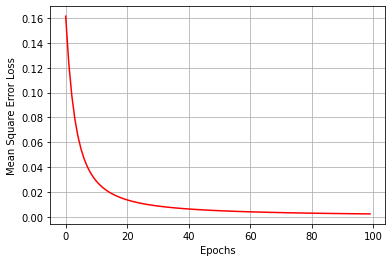

In [12]:
# Plot loss versus epochs
epochs = range(len(losses))
plt.plot(epochs, losses, 'r')
plt.ylabel('Mean Square Error Loss')
plt.xlabel('Epochs')
plt.grid(True)

# Show figure
plt.show()

## Make predictions

In [13]:
# Define positive and negative pair inputs
pos = np.array([9, 9])
neg = np.array([-1, -9])

# Pass them to the "trained" model to make predictions
print("Positive pair is identified as: {:.3f}".format(network.forward(pos)))
print("Negative pair is identified as: {:.3f}".format(network.forward(neg)))

Positive pair is identified as: 0.961
Negative pair is identified as: 0.053


Happy Learning!